In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('C:/Users/JoshuaMeldrum/Downloads/project_regression/regression_data.csv')

In [5]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/2014,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/2015,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/2014,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/2015,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [6]:
data.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64

In [7]:
data.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

<AxesSubplot:>

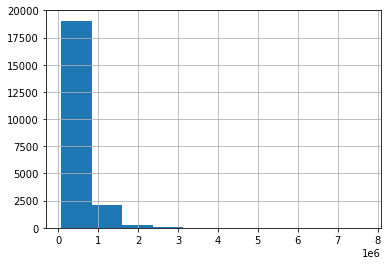

In [8]:
data['price'].hist()

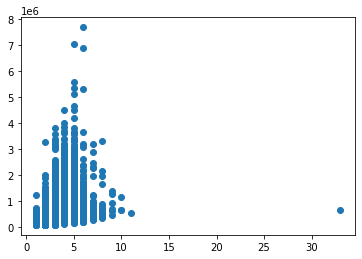

In [9]:
plt.scatter(x=data['bedrooms'], y=data['price'])
plt.show()

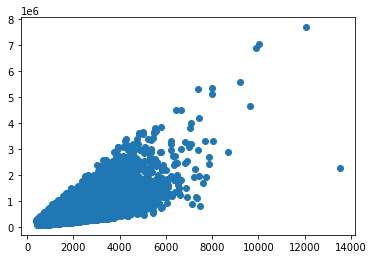

In [10]:
plt.scatter(x=data['sqft_living'], y=data['price'])
plt.show()

In [49]:
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [57]:
corr_data = data
correlations_matrix = corr_data.corr()
correlations_matrix

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.000000,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.016772
bedrooms,0.001150,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.308787
bathrooms,0.005162,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303,0.525906
sqft_living,-0.012241,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342,0.701917
sqft_lot,-0.131911,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.089876
floors,0.018608,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.256804
waterfront,-0.002727,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781,0.266398
view,0.011536,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904,0.397370
condition,-0.023803,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.036056
grade,0.008188,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,-0.185771,0.113575,0.200341,0.713867,0.120981,0.667951


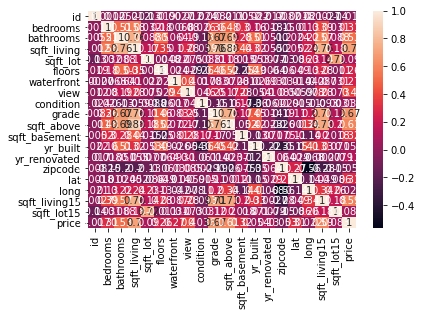

In [58]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [52]:
corr_data = data.drop(['price', 'sqft_living15', 'sqft_lot15', 'lat', 'long', 'id', 'waterfront', 'view', 'date', 'zipcode'], axis=1)
correlations_matrix = corr_data.corr()
correlations_matrix

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788
grade,0.356563,0.665838,0.762779,0.114731,0.458794,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,-0.158904,0.756073,1.000000,-0.052156,0.424037,0.023251
sqft_basement,0.302808,0.283440,0.435130,0.015418,-0.245715,0.173849,0.168220,-0.052156,1.000000,-0.133064,0.071233
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,-0.361592,0.447865,0.424037,-0.133064,1.000000,-0.224907


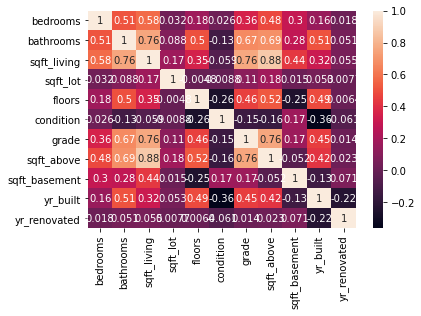

In [53]:
#improves accuracy with more relavent indepdendant variables
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [21]:
y = data.price
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21592    360000
21593    400000
21594    402101
21595    400000
21596    325000
Name: price, Length: 21597, dtype: int64

In [76]:
#dropped columns I thought to be unneccessary predictors
x = data.drop(['price', 'sqft_living15', 'sqft_lot15', 'lat', 'long', 'id', 'view', 'date', 'zipcode' ], axis=1)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0
1,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991
2,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0
3,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0
4,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,0
21593,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,0
21594,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,0
21595,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,0


In [77]:
#splitting the data (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [78]:
#data shape
x_train.shape, y_train.shape

((17277, 12), (17277,))

In [79]:
x_test.shape, y_test.shape

((4320, 12), (4320,))

In [80]:
#define regression model
model = linear_model.LinearRegression()

In [81]:
#train the regression model
model.fit(x_train, y_train)

LinearRegression()

In [82]:
#prediction
y_pred = model.predict(x_test)

In [84]:
#model performance

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [-4.44751552e+04  4.53366893e+04  1.23363957e+02 -2.69674460e-01
  2.75926905e+04  7.35748023e+05  1.90735278e+04  1.31593068e+05
  5.15768325e+01  7.17871246e+01 -3.74677716e+03  9.76869167e+00]
Intercept: 6493518.341621177
Mean squared error (MSE): 43212054401.72
Coefficient of determination (R^2): 0.66


In [85]:
y_test

8213      165000
19631    1040000
11743     250000
1823      501000
2138     1700000
          ...   
1074      320000
4140      701000
3794      680000
11667     840000
2491      195000
Name: price, Length: 4320, dtype: int64

In [86]:
np.array(y_test)

array([ 165000, 1040000,  250000, ...,  680000,  840000,  195000],
      dtype=int64)

In [87]:
y_pred

array([ 157902.42721542,  932525.90937536,  293667.37416947, ...,
        658942.8312653 , 1023592.15753286,  284058.08174944])

<AxesSubplot:xlabel='price'>

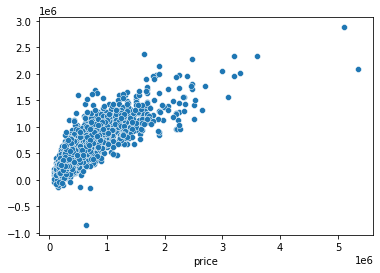

In [88]:
sns.scatterplot(y_test, y_pred)